<a href="https://colab.research.google.com/github/mustafabozkaya/Data_Science_Bootcamp/blob/master/hospital_patient_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img align="Left" width="100" height="100" src="https://thumbs.dreamstime.com/b/mb-initial-letter-vector-logo-icon-mb-initial-letter-vector-logo-icon-204517753.jpg">](https://github.com/mustafabozkaya)

# AI/ML Challenge

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

---

##### Objective

You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

---

##### Evaluation Criteria

Submissions are evaluated using the F1 Score. How do we do it?

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable.

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on evaluation data. Finally, an F1 score for your model will be generated and displayed

##### About the dataset

The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

* Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
* Survived_1_year == 1, implies that the patient survived after 1 year of treatment

To load the dataset in your jupyter notebook, use the below command:

```
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
```

---

Data Description:

* ID_Patient_Care_Situation: Care situation of a patient during treatment
* Diagnosed_Condition: The diagnosed condition of the patient
* ID_Patient: Patient identifier number
* Treatment_with_drugs: Class of drugs used during treatment
* Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
* Patient_Age: Age of the patient
* Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
* Patient_Smoker: If the patient was a smoker or not
* Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
* Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

Feel free to google 'Diagnose' and 'Body Mass Index' if you don't know about these terms.

---

To load the test dataset in your jupyter notebook, use the below command:

```

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
```

###### Resources

[Train Data](https://s3.us-west-1.wasabisys.com/dphi/datasets/210/Train_Data.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=uEIpolTYYsBC1x6HmKwY8qVzX1g%3D&Expires=1668192455)

[Test Data](https://s3.us-west-1.wasabisys.com/dphi/datasets/210/Test_Data.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=O5lG%2FOmWozs2S%2FOl3egDcViLqEM%3D&Expires=1668192455)

[Sample Submission](https://s3.us-west-1.wasabisys.com/dphi/datasets/210/Sample_Submission.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=LcYZBD7QpWp9hcqWKRXu9sc7ieI%3D&Expires=1668192455)

###### Submission guidelines

1. Your predictions file must be a CSV and its first row i.e header field must be **prediction**
2. You must upload .ipynb notebook file as a solution to the question

###### Evaluation Metric

F1Score evaluation metric is used for evaluating model predictions

###### Additional guidelines

* You can make any number of submissions.
* Please ensure you submit both prediction file and notebook before the end date
* Test

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes (GaussianNB)for classification
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron (MLP)for classification
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)for classification
from sklearn.svm import SVC # Support Vector Machines (SVM)for classification
from sklearn.tree import DecisionTreeClassifier # Decision Tree (DT)for classification
from sklearn.ensemble import RandomForestClassifier # Random Forest (RF)for classification
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting (GB)for classification
from sklearn.linear_model import LogisticRegression # Logistic Regression (LR)for classification
from sklearn.ensemble import VotingClassifier # Voting Classifier for classification
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classifier for classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Linear Discriminant Analysis (LDA)for classification
from sklearn.ensemble import BaggingClassifier # Bagging Classifier for classification
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees Classifier for classification
from xgboost import XGBClassifier  # XGBoost Classifier for classification



Load the Dataset

In [8]:
train = pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
train

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [9]:
train.drop(['ID_Patient_Care_Situation'],axis=1,inplace=True)

In [10]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,NO,URBAN,Stable,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [11]:
test.drop(['ID_Patient_Care_Situation'],axis=1,inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       23097 non-null  int64  
 1   Patient_ID                23097 non-null  int64  
 2   Treated_with_drugs        23084 non-null  object 
 3   Patient_Age               23097 non-null  int64  
 4   Patient_Body_Mass_Index   23097 non-null  float64
 5   Patient_Smoker            23097 non-null  object 
 6   Patient_Rural_Urban       23097 non-null  object 
 7   Patient_mental_condition  23097 non-null  object 
 8   A                         21862 non-null  float64
 9   B                         21862 non-null  float64
 10  C                         21862 non-null  float64
 11  D                         21862 non-null  float64
 12  E                         21862 non-null  float64
 13  F                         21862 non-null  float64
 14  Z     

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diagnosed_Condition       9303 non-null   int64  
 1   Patient_ID                9303 non-null   int64  
 2   Treated_with_drugs        9303 non-null   object 
 3   Patient_Age               9303 non-null   int64  
 4   Patient_Body_Mass_Index   9303 non-null   float64
 5   Patient_Smoker            9303 non-null   object 
 6   Patient_Rural_Urban       9303 non-null   object 
 7   Patient_mental_condition  9303 non-null   object 
 8   A                         9303 non-null   float64
 9   B                         9303 non-null   float64
 10  C                         9303 non-null   float64
 11  D                         9303 non-null   float64
 12  E                         9303 non-null   float64
 13  F                         9303 non-null   float64
 14  Z       

In [14]:
train.isnull().sum()

Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs            13
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                           1235
B                           1235
C                           1235
D                           1235
E                           1235
F                           1235
Z                           1235
Number_of_prev_cond         1235
Survived_1_year                0
dtype: int64

In [15]:
test.isnull().sum()

Diagnosed_Condition         0
Patient_ID                  0
Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
dtype: int64

In [16]:
train["Survived_1_year"].value_counts()


1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [17]:
labels = np.array(train['Survived_1_year'])
labels
sum(labels)/len(labels)

0.6322466121141274

**Basic Feature Engineering**

Here we convert the categorical columns with string values to numeric representations. Typically the XGBoost model can handle categorical data natively being a tree-based model so we don’t one-hot encode the features here.

In [18]:
train['Treated_with_drugs']=train['Treated_with_drugs'].astype('category')
train['Patient_Smoker']=train['Patient_Smoker'].astype('category')
train['Patient_Rural_Urban']=train['Patient_Rural_Urban'].astype('category')
train['Patient_mental_condition']=train['Patient_mental_condition'].astype('category')

In [19]:
test['Treated_with_drugs']=test['Treated_with_drugs'].astype('category')
test['Patient_Smoker']=test['Patient_Smoker'].astype('category')
test['Patient_Rural_Urban']=test['Patient_Rural_Urban'].astype('category')
test['Patient_mental_condition']=test['Patient_mental_condition'].astype('category')

In [20]:
cat_cols = train.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
cat_cols

Index(['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban',
       'Patient_mental_condition'],
      dtype='object')

In [21]:
cat_cols1 = test.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
cat_cols1

Index(['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban',
       'Patient_mental_condition'],
      dtype='object')

In [22]:
train[cat_cols] = train[cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
train.head()


,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,3333,31,56,18.479385,2,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,5740,16,36,22.945566,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,10446,31,48,27.510027,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,12011,0,5,19.130976,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0,12513,-1,128,1.348400,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [23]:
test[cat_cols1] = test[cat_cols1].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
test.head()

,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,40,3709,24,16,29.443894,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,52,986,31,24,26.836321,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,50,11821,29,63,25.523280,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,32,3292,31,42,27.171155,0,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,20,9959,24,50,25.556192,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Building Train and Test Datasets**

For any machine learning model, we always need train and test datasets. We will be building the model on the train dataset and test the performance on the test dataset.

We will maintain two datasets:

-One with the encoded categorical values will be used for training our model. (X_train, X_test, y_train, y_test)

-One with the original values will be used for model interpretation since we'll be able to see actual values and not encoded values on the graphs. (X_train_disp, X_test_disp, y_train_disp, y_test_disp)

In [24]:
x = train.drop("Survived_1_year",axis=1)
y = train['Survived_1_year']

Splitting Dataset into 70 and 30 percentage 

In [25]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)
X_train.head()

(16167, 16) (6930, 16)


,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
15397,15,12254,31,48,24.726979,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17511,40,954,24,55,24.708342,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2358,49,11947,13,13,24.839501,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
6023,4,12342,31,65,19.681295,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
439,51,4354,31,0,25.405622,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Building and Training the classification model**

We will now train and build a basic boosting classification model on our training data using the popular XGBoost framework, an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

You can use any other classification model as well.

**n_estimators**: The number of trees

**max_depth**: Maximum depth of a tree. default=6

**random_state**: Used for reproducability, so that everybody can consistently see the same output when they run the code.

In tree-based models, hyper-parameters include things like the maximum depth of the tree, the number of trees to grow, the number of variables to consider when building each tree, the minimum number of samples on a leaf, the fraction of observations used to build a tree, and a few others.

## XGB Classifier

In [26]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier

In [27]:
xgc.fit(X_train, y_train) # Training the model with fit method

XGBClassifier(max_depth=5, n_estimators=500, random_state=42)

## NN Classifier

In [38]:
X_train.shape

(16167, 16)

In [39]:
# Building the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

In [40]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [41]:
# printing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 729
Trainable params: 729
Non-trainable 

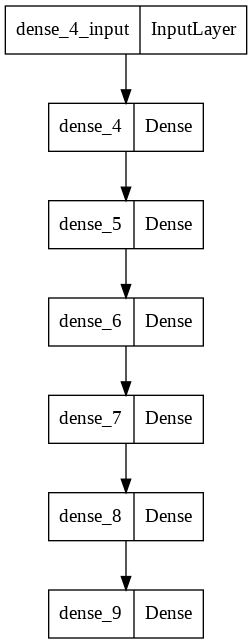

In [42]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)


In [43]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/200
1294/1294 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.3646 - val_loss: nan - val_accuracy: 0.3741
Epoch 2/200
1294/1294 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.3646 - val_loss: nan - val_accuracy: 0.3741
Epoch 3/200
1294/1294 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.3646 - val_loss: nan - val_accuracy: 0.3741
Epoch 4/200
1294/1294 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.3646 - val_loss: nan - val_accuracy: 0.3741
Epoch 5/200
1294/1294 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.3646 - val_loss: nan - val_accuracy: 0.3741
Epoch 6/200
1294/1294 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.3646 - val_loss: nan - val_accuracy: 0.3741
Epoch 7/200
1294/1294 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.3646 - val_loss: nan - val_accuracy: 0.3741
Epoch 8/200
1294/1294 [====

KeyboardInterrupt: ignored

In [45]:

model.evaluate(X_test, y_test)

NameError: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**Making predictions on the test data**

Here we do the usual, use the trained model to make predictions on the test dataset.

In [28]:
predictions = xgc.predict(X_val) 
predictions[:10]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

**Model Performance Evaluation**

Time to put the model to the test! Let’s evaluate how our model has performed with its predictions on the test data.

In [29]:
accuracy_score(y_val, predictions)

0.8360750360750361

In [30]:
target = xgc.predict(test)
target 

array([1, 1, 1, ..., 1, 0, 1])

In [31]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv')
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>